What is the attention mechanism in Transformers and how do we calculate it? What is KV-cache ?   
  
Attention is showing every word in the target language to which word in the source language they are actually connected.  
In RNNs the attention scores can be computed as dot product.    
   
**Attention in transformers** is been used to understand the ways of connectivity between words. To measure connectivity between words we have two specific vectors for every word: query and key.  Query is for the word from which we are looking and key is for the word we are looking at. Value says us what actually is x.  
As an example if we have sentence: x1, x2.   
Let's choose x1. We want $x1 -> z1$ where $z3 = sum(a_i*v_i)$, $a_i$ - attention, $v_i$ - values.     
when we look from x1 we take Query, when we look in x1 we take Key.  
So we have:  
$z1 = q1*k1*v1 + q1*k2*v2.$   
Now we need to normalize our vector on the size of the space. We need normalization to fix variance increasing. As we know from dispersion properties $D(\frac{\xi}{\sqrt{m}}) = \frac{D(\xi)}{m}$.   
So we need normalization on the size of space $\sqrt{d_k}$.  
The final formula for attention is:   
$softmax(\frac{Q*K^T}{\sqrt{d_k}})*V$  
**Attention Finally**     
Calculate Query, Key, Value.  
Calculate scores.   
Divide by $\sqrt(d_k)$  
Get softmax  
Multiply each value vector by the softmax vector  
Sum up the weighted value vectors.  
   
**Multi-head attention:**   
We can use just one attention head, but we can use another attention head, which will learn different dependencies.  
We calculate attention separately in N different attention heads.   
Concatenate all the attention heads.  
Multiply with a weight matrix W that was trained with the model.  
The result would be matrix Z that captures all information from all the attention heads. We can send this forward to the FFNN. 

   
**KV-cache**   
KV caching happens only in the decoder during token generation. Because the decoder is causal (each token only looks at the ones before it), we keep recalculating attention for the same previous tokens at every step, even though we only need to calculate attention for the new token. By saving (caching) the previous Keys and Values, we avoid redoing those calculations and focus just on the new token, making the process faster and more efficient.

Can you identify types of parallelism strategies listed at here?   
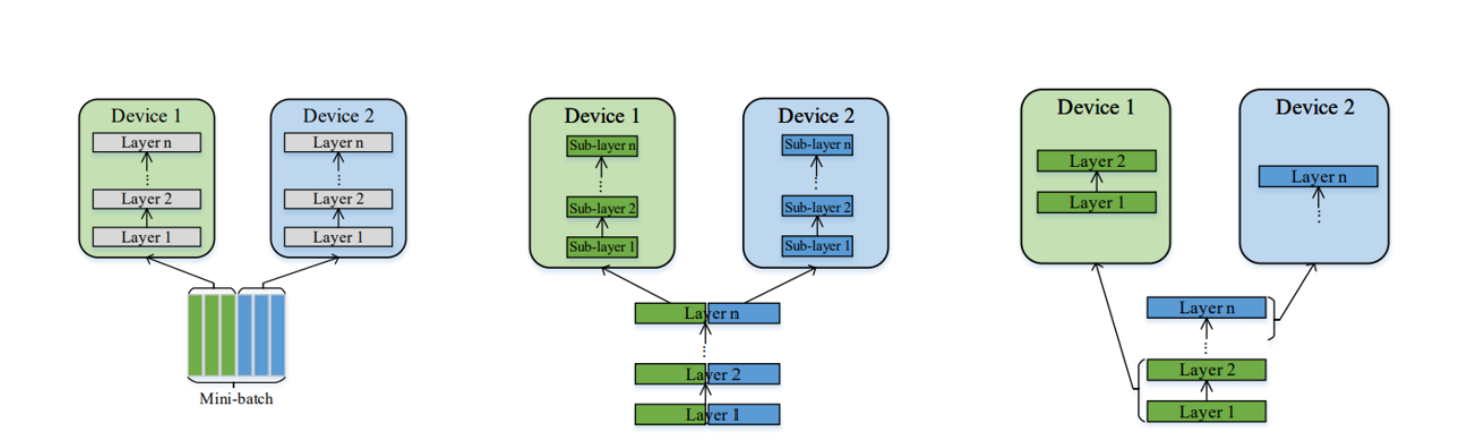
1. **Data Parallelism on Batches**: Splits the input data across multiple devices, with each device processing a separate batch and synchronizing gradients to update the model.  
2. **Tensor Parallelism**: Distributes individual layers of the model (e.g., weights or computations) across multiple devices to handle larger models.  
3. **Pipeline Parallelism**: Splits the model into stages, with each stage running on a different device, allowing sequential processing of data across devices.

Which metrics suitable for ML problems and which type of problems it can do?  


### Classical ML (Supervised and Unsupervised):  
1. **Classification**:  
   - **Precision**: Measures the accuracy of positive predictions.   
   Predicting discrete labels (e.g., spam detection, fraud detection).   
     $
     \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
     $  
   - **Recall (Sensitivity)**: Measures the proportion of actual positives correctly identified.  
     $
     \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
     $  
   - **F1-Score**: Harmonic mean of precision and recall.  
   - **ROC AUC**: Area under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between classes.  
   - **Lift**: Measures the improvement in model performance compared to a random baseline.  
     $
     \text{Lift} = \frac{\text{Precision}}{\text{Proportion of Positive Class}}
     $  

2. **Regression**: 
Predicting continuous values (e.g., house price prediction, stock price forecasting, temperature prediction).  
   - **MSE (Mean Squared Error)**: Average squared difference between predicted and actual values.  
   - **MAE (Mean Absolute Error)**: Average absolute difference between predicted and actual values.  
   - **MPE (Mean Percentage Error)**: Average percentage difference between predicted and actual values.  
   - **R² (R-squared)**: Proportion of variance in the dependent variable explained by the model.  
     $
     R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
     $  

3. **Clustering**:  
Grouping similar data points (e.g., customer segmentation, document clustering, anomaly detection).  
   - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters.  
     $
     \text{Silhouette Score} = \frac{b - a}{\max(a, b)}
     $  
     Where \( a \) is the mean intra-cluster distance, and \( b \) is the mean nearest-cluster distance.  
   - **Adjusted Mutual Information (AMI)**: Measures agreement between two clusterings, adjusted for chance.   

4. **Uplift Modeling**:  
Estimating the causal impact of interventions (e.g., marketing campaign effectiveness, personalized medicine, policy evaluation).
   - **ATE (Average Treatment Effect)**: Measures the average impact of a treatment on the outcome.  
     $
     \text{ATE} = \frac{1}{n} \sum_{i=1}^n (Y_i^T - Y_i^C)
     $ 
     Where \( Y_i^T \) is the outcome with treatment, and \( Y_i^C \) is the outcome without treatment.  
   - **Uplift**: Measures the incremental impact of a treatment compared to no treatment.  
     $
     \text{Uplift} = P(Y=1 | T=1) - P(Y=1 | T=0)
     $  

Resolve the task, https://learngitbranching.js.org/:  
Here's a development situation that often happens: I'm trying to track down a bug but it is quite elusive. In order to aid in my detective work, I put in a few debug commands and a few print statements.  
All of these debugging / print statements are in their own commits. Finally I track down the bug, fix it, and rejoice!
Only problem is that I now need to get my bugFix back into the main branch. If I simply fast-forwarded main, then main would get all my debug statements which is undesirable. There has to be another way...   

    
git checkout -b debug  
git commit -m "debug"  
git checkout -b printf    
git commit -m "printf"    
git checkout -b bugFix      
git commit -m "bugfix"    
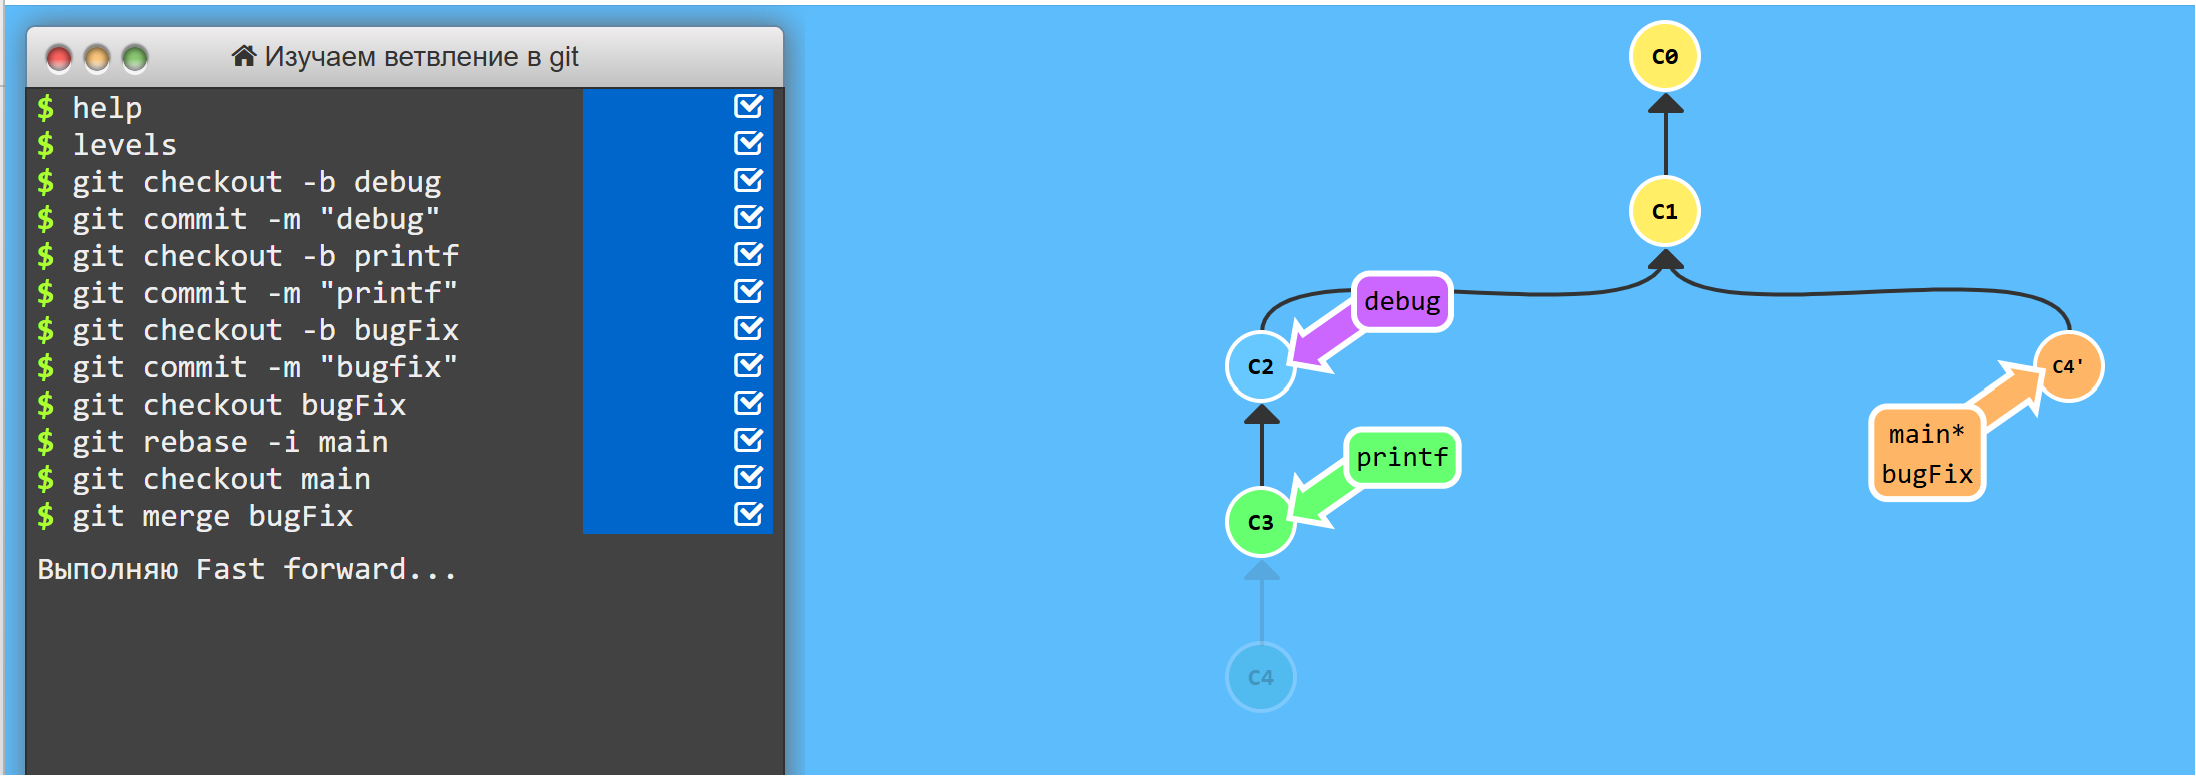  
Answer:  
git checkout bugFix  
git rebase -i main  
git checkout main  
git merge bugFix  

Build a system of classes for Zoo (OOP + software design):  
Must be able to accommodate an animal  
Should be able to feed the animal if it is hungry  
Should be able to treat the animal if it is sick  
Can give the animal to another Zoo    

In [83]:
import pandas as pd

class Animal:
    def __init__(self, name: str, animal_type: str, hunger_level: str, health_level: str, ready_to_move: bool):
        """
        Represents an animal in the zoo.
        :param name: Name of the animal.
        :param animal_type: Type of the animal (e.g., Lion, Tiger).
        :param hunger_level: Hunger level of the animal (e.g., "hungry", "not hungry").
        :param health_level: Health status of the animal (e.g., "healthy", "not healthy", "rehabilitation").
        :param ready_to_move: Whether the animal is ready to be moved to another zoo.
        """
        self.name = name
        self.animal_type = animal_type
        self.hunger_level = hunger_level
        self.health_level = health_level
        self.ready_to_move = ready_to_move

    def __str__(self):
        return f"Animal(Name: {self.name}, Type: {self.animal_type}, Hunger: {self.hunger_level}, Health: {self.health_level}, Ready to Move: {self.ready_to_move})"


class Zoo:
    def __init__(self, name: str):
        """
        Represents a zoo that can accommodate animals.
        :param name: Name of the zoo.
        """
        self.name = name
        self.animals = pd.DataFrame(columns=["name", "animal_type", "hunger_level", "health_level", "ready_to_move"])

    def add_animal(self, animal: Animal):
        """
        Adds an animal to the zoo.
        :param animal: Animal object to add.
        """
        new_animal = {
            "name": animal.name,
            "animal_type": animal.animal_type,
            "hunger_level": animal.hunger_level,
            "health_level": animal.health_level,
            "ready_to_move": animal.ready_to_move,
        }
        self.animals = self.animals.append(new_animal, ignore_index=True)
        print(f"Added {animal.name} to {self.name}.")

    def feed_animal(self, animal_name: str):
        """
        Feeds an animal if it is hungry.
        :param animal_name: Name of the animal to feed.
        """
        if animal_name in self.animals["name"].values:
            index = self.animals[self.animals["name"] == animal_name].index[0]
            if self.animals.at[index, "hunger_level"] == "hungry":
                self.animals.at[index, "hunger_level"] = "not hungry"
                print(f"{animal_name} has been fed.")
            else:
                print(f"{animal_name} is not hungry.")
        else:
            print(f"Animal {animal_name} not found in {self.name}.")

    def treat_animal(self, animal_name: str):
        """
        Treats an animal if it is sick.
        :param animal_name: Name of the animal to treat.
        """
        if animal_name in self.animals["name"].values:
            index = self.animals[self.animals["name"] == animal_name].index[0]
            if self.animals.at[index, "health_level"] == "not healthy":
                self.animals.at[index, "health_level"] = "rehabilitation"
                print(f"{animal_name} is under treatment.")
            elif self.animals.at[index, "health_level"] == "rehabilitation":
                self.animals.at[index, "health_level"] = "healthy"
                print(f"{animal_name} has been treated and is now healthy.")
            else:
                print(f"{animal_name} is already healthy.")
        else:
            print(f"Animal {animal_name} not found in {self.name}.")
    
    def prepare_animal(self, animal_name: str):
        index = self.animals[self.animals["name"] == animal_name].index[0]
        self.animals.loc[index, "ready_to_move"] = True

    def move_animal(self, animal_name: str, destination_zoo: 'Zoo'):
        """
        Moves an animal to another zoo if it is ready to move.
        :param animal_name: Name of the animal to move.
        :param destination_zoo: Destination zoo object.
        """
        if animal_name in self.animals["name"].values:
            index = self.animals[self.animals["name"] == animal_name].index[0]
            if self.animals.loc[index, "ready_to_move"]:
                # transaction
                try:
                    # lock animal for different threads
                    self.animals.loc[index, "ready_to_move"] = False
                    animal_data = self.animals.loc[index].to_dict()
                    destination_zoo.add_animal(Animal(**animal_data))
                    self.animals.drop(index, inplace=True)
                    print(f"{animal_name} has been moved to {destination_zoo.name}.")
                except:
                    # rollback in case of error
                    print(f"Failed to move {animal_name} to {destination_zoo.name}. Rollback...")
                    if animal_name not in self.animals.name.values:
                        self.add_animal(Animal(**animal_data))
                    if animal_name in destination_zoo.animals.name.values:
                        index = destination_zoo.animals[destination_zoo.animals["name"] == animal_name].index[0]
                        destination_zoo.animals.drop(index, inplace=True)
                    index = self.animals[self.animals["name"] == animal_name].index[0]
                    self.animals.loc[index, "ready_to_move"] = True
            else:
                print(f"{animal_name} is not ready to move.")
        else:
            print(f"Animal {animal_name} not found in {self.name}.")

    def display_animals(self):
        """
        Displays all animals in the zoo.
        """
        print(f"Animals in {self.name}:")
        print(self.animals)

In [64]:
index = zoo1.animals[zoo1.animals.name == 'Rajah'].index[0]
zoo1.animals.loc[index]
# index
# zoo1.animals.at[]
# zoo1.animals.loc[index].ready_to_move

name                      Rajah
animal_type               Tiger
hunger_level         not hungry
health_level     rehabilitation
ready_to_move             False
Name: 1, dtype: object

In [61]:
zoo1.animals

,name,animal_type,hunger_level,health_level,ready_to_move
1,Rajah,Tiger,not hungry,rehabilitation,False


In [84]:
# Create animals
lion = Animal(name="Simba", animal_type="Lion", hunger_level="hungry", health_level="healthy", ready_to_move=False)
tiger = Animal(name="Rajah", animal_type="Tiger", hunger_level="not hungry", health_level="not healthy", ready_to_move=False)

# Create zoos
zoo1 = Zoo(name="Central Zoo")
zoo2 = Zoo(name="Safari Park")

# Add animals to zoo1
zoo1.add_animal(lion)
zoo1.add_animal(tiger)

# Display animals in zoo1
zoo1.display_animals()

# Feed and treat animals
zoo1.feed_animal("Simba")
zoo1.treat_animal("Rajah")

# Move an animal to another zoo
zoo1.prepare_animal("Simba")
zoo1.move_animal("Simba", zoo2)

# Display animals in both zoos
zoo1.display_animals()
zoo2.display_animals()

Added Simba to Central Zoo.
Added Rajah to Central Zoo.
Animals in Central Zoo:
    name animal_type hunger_level health_level ready_to_move
0  Simba        Lion       hungry      healthy         False
1  Rajah       Tiger   not hungry  not healthy         False
Simba has been fed.
Rajah is under treatment.
Added Simba to Safari Park.
Simba has been moved to Safari Park.
Animals in Central Zoo:
    name animal_type hunger_level    health_level ready_to_move
1  Rajah       Tiger   not hungry  rehabilitation         False
Animals in Safari Park:
    name animal_type hunger_level health_level ready_to_move
0  Simba        Lion   not hungry      healthy         False


C:\Users\Mariia\AppData\Local\Temp\ipykernel_39124\1951308729.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.animals = self.animals.append(new_animal, ignore_index=True)
C:\Users\Mariia\AppData\Local\Temp\ipykernel_39124\1951308729.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.animals = self.animals.append(new_animal, ignore_index=True)
C:\Users\Mariia\AppData\Local\Temp\ipykernel_39124\1951308729.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.animals = self.animals.append(new_animal, ignore_index=True)


Calculate a derivative .
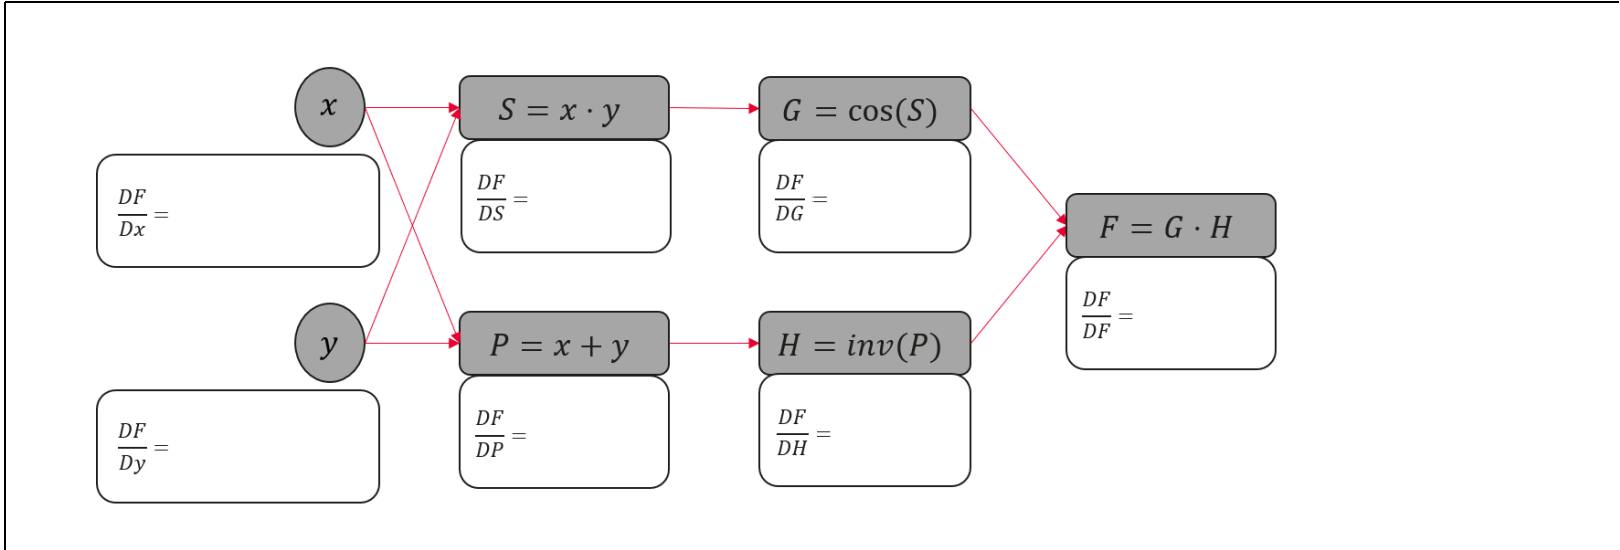

To calculate the **resulting derivatives** and combine them, we need to substitute the known values and simplify the expressions. Let's go step by step:

### Given:
1. $ F = G \cdot H $
2. $ G = \cos(S) $
3. $ S = x \cdot y $
4. $ H = \frac{1}{P} $
5. $ P = x + y $


### Derivatives:
1. $ \frac{DF}{DF} = 1 $
2. $ \frac{DF}{DG} = H $
3. $ \frac{DF}{DS} = -H \cdot \sin(S) $
4. $ \frac{DF}{Dx} = -H \cdot \sin(S) \cdot y $
5. $ \frac{DF}{DH} = G $
6. $ \frac{DF}{DP} = -\frac{G}{P^2} $
7. $ \frac{DF}{Dy} = -\frac{G}{P^2} $


We can rewrite from $ H = \frac{1}{P} $ and $ G = \cos(S) $. And we can rewrite 
from $ S = x \cdot y $ and $ P = x + y $.
  
Let's simplify each derivative step by step.

#### 1. $ \frac{DF}{DG} = H $ becomes $
\frac{DF}{DG} = \frac{1}{P}
$

#### 2. $ \frac{DF}{DS} = -H \cdot \sin(S) $ becomes $
\frac{DF}{DS} = -\frac{1}{P} \cdot \sin(x \cdot y)
$

#### 3. $ \frac{DF}{Dx} = -H \cdot \sin(S) \cdot y $ becomes $
\frac{DF}{Dx} = -\frac{1}{P} \cdot \sin(x \cdot y) \cdot y
$

#### 4. $ \frac{DF}{DH} = G $ becomes $
\frac{DF}{DH} = \cos(S) = \cos(x \cdot y)
$

#### 5. $ \frac{DF}{DP} = -\frac{G}{P^2} $ becomes $
\frac{DF}{DP} = -\frac{\cos(x \cdot y)}{(x + y)^2}
$

#### 6. $ \frac{DF}{Dy} = -\frac{G}{P^2} $ becomes $
\frac{DF}{Dy} = -\frac{\cos(x \cdot y)}{(x + y)^2}
$

**Combine the Derivatives**

1. $ \frac{DF}{DF} = 1 $
2. $ \frac{DF}{DG} = \frac{1}{x + y} $
3. $ \frac{DF}{DS} = -\frac{1}{x + y} \cdot \sin(x \cdot y) $
4. $ \frac{DF}{Dx} = -\frac{1}{x + y} \cdot \sin(x \cdot y) \cdot y $
5. $ \frac{DF}{DH} = \cos(x \cdot y) $
6. $ \frac{DF}{DP} = -\frac{\cos(x \cdot y)}{(x + y)^2} $
7. $ \frac{DF}{Dy} = -\frac{\cos(x \cdot y)}{(x + y)^2} $


Can you explain how different types of regularization (l1, l2, dropout, and batchnorm) work? How batch norm operates during the inference of DL models ?     
   
**L1 Regularization:** Adds the sum of absolute values of weights to the loss function, encouraging sparsity by driving some weights to zero. Useful for feature selection.    
**L2 Regularization:** Adds the sum of squared weights to the loss function, penalizing large weights and promoting smaller, more distributed weights. Helps prevent overfitting.   
Dropout: Randomly "drops" (sets to zero) a fraction of neurons during training, preventing over-value for some neurons and overfitting.   
**Batch Normalization (BatchNorm):** Normalizes layer inputs by adjusting and scaling activations during training. During inference, it uses fixed population statistics (mean/variance) instead of batch statistics, ensuring consistent behavior.   
Layer Normalization (LayerNorm): LayerNorm normalizes the activations across the features (channels) for each individual data point, rather than across the batch (as in BatchNorm). It computes the mean and variance for each sample independently and applies normalization.  
**Why LayerNorm is Used in Transformers:**  
LayerNorm operates independently on each token, making it suitable for variable-length sequences.   
By normalizing activations, LayerNorm helps mitigate issues like vanishing/exploding gradients, which are critical in deep architectures like Transformers.   

Coding Problem (Python + Machine Learning + Optimization):
Let us assume that we have a polynomial regression task of view , as below:

Here, C = [0.32, -1.233, 9.11, -2.32, 17.0, 44.121, -12.322, 0.3423, 1.283, 10.238723]
x – is unknown variable, and .
Write down the code for solving this polynomial regression problem with the precision of 

In [7]:
# 0.32*x^10-1.233*x^9+9.11*x^8-2.32*x^7+17*x^6+44.121*x^5-12.322*x^4+0.3423*x^3+1.283*x^2+10.238723*x

def find_x(coefs, y):
    
    def f(x, coefs):
        out = 0
        n = len(coefs)
        for i in range(n):
            out += coefs[i] * (x ** (n - i - 1))
        return out
    
    def gradient(x, coefs):
        grad = 0
        n = len(coefs)
        for i in range(n):
            power = n - i - 1
            if power > 0:  # Avoid multiplying by zero for x^0
                grad += coefs[i] * power * (x ** (power - 1))
        return grad
    
    def loss(a, b):
        return (a-b)**2

    x = 0.0
    eps = 1e-10
    alpha = 0.01
    num_iter = 1000

    for i in range(num_iter):
        fx = f(x, coefs)
        error = loss(fx, y)
        if error < eps:
            break
        x = x - alpha*gradient(x, coefs)

    return x


coefs = [0.32, -1.233, 9.11, -2.32, 17.0, 44.121, -12.322, 0.3423, 1.283, 10.238723]
y = 3.14159265358979323846
print(find_x(coefs, y))

-0.14059749311357309
